In [1]:
%run twisted_graphene.py

In [26]:
g=TwistedBilayerGraphene(1,1)

In [27]:
np.sqrt(3.35**2+5.0**2)

6.018513105410671

In [28]:
g.calc_hops(6.02)
# g.calc_hops(3.36)

/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:208: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:209: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


In [29]:
g.set_kpath(g.path_GMKG,[120,50,150])

In [30]:
V=1.4
g.set_hamiltonian(1.0,V)

In [31]:
g.calc_bands_and_layer_characters(26,0.0)

In [32]:
g.bandsV=g.bands
g.layer1_characterV=g.layer1_character
g.layer2_characterV=g.layer2_character

In [33]:
g.set_hamiltonian(1.0,0.0)

In [34]:
g.calc_bands(26,0.0)

In [35]:
g.bands0=g.bands
g.layer1_character0=g.layer1_character
g.layer2_character0=g.layer2_character

In [36]:
gdef=g

In [37]:
def build_t_inter(hop_ratio=0.2):
    
    t1=2.8922

    def t_inter(x1,y1,x2,y2,l1,l2,theta):
        """
        Interlayer hoppings of graphene.

        l1 and l2 are the sublayers associated to the initial (x1,y1) and final (x2,y2) positions, respectively.

        theta is the twist angle.
        """
        a=2.46 #Angstrom. Lattice constant of graphene
        x=x2-x1
        y=y2-y1
        r=np.sqrt(x**2+y**2)

        l0, l3, l6 = 0.3155, -0.0688, -0.0083
        xi0, xi3, xi6 = 1.7543, 3.4692, 2.8764
        x3, x6 = 0.5212, 1.5206
        k0, k6 = 2.0010, 1.5731

        rn=r/a
        V0=l0 * np.exp(-xi0 * rn**2) * np.cos(k0*rn)
        V3=l3 * rn**2 * np.exp(-xi3 * (rn-x3)**2)
        V6=l6 * np.exp(-xi6 * (rn-x6)**2) * np.sin(k6 * rn)

        c3 = lambda x: 4*x**3-3*x # cosseno do arco triplo
        c6 = lambda x: 32*x**6-48*x**4+18*x**2-1 # cosseno do arco sextuplo
        xx=np.nan_to_num(x/r) #cosseno direcional na direção x
        yy=np.nan_to_num(y/r) #cosseno direcional na direção y
        cos3=l1*c3(xx)-l2*c3(xx*np.cos(theta)+yy*np.sin(theta)) #termo chato que muda de sinal dependendo da sub-rede
        cos6=c6(xx)+c6(xx*np.cos(theta)+yy*np.sin(theta)) #termo par, não depende da sub-rede

        return (V0+V3*cos3+V6*cos6)*(hop_ratio*t1/l0)

    return t_inter

In [38]:
g=TwistedBilayerGraphene(1,1)

In [39]:
hop_ratio=0.5
g.calc_hops(6.02,t_inter=build_t_inter(hop_ratio))
# g.calc_hops(3.36)

/tmp/ipykernel_103541/2588590142.py:30: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/tmp/ipykernel_103541/2588590142.py:31: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


In [40]:
g.set_kpath(g.path_GMKG,[120,50,150])

In [41]:
V=1.4
g.set_hamiltonian(1.0,V)

In [42]:
g.calc_bands_and_layer_characters(26,0.0)

In [43]:
g.bandsV=g.bands
g.layer1_characterV=g.layer1_character
g.layer2_characterV=g.layer2_character

In [44]:
g.set_hamiltonian(1.0,0.0)

In [45]:
g.calc_bands(26,0.0)

In [46]:
g.bands0=g.bands
g.layer1_character0=g.layer1_character
g.layer2_character0=g.layer2_character

In [47]:
gg=g

In [48]:
def plot_bands_with_cmap(bands,ell,weights,cmap):
    vmin=np.min(weights)
    vmax=np.max(weights)
    for i in range(bands.shape[1]):
        plt.scatter(ell,bands[:,i],c=weights[:,i],cmap=cmap,marker='.',vmin=vmin,vmax=vmax,s=0.2)

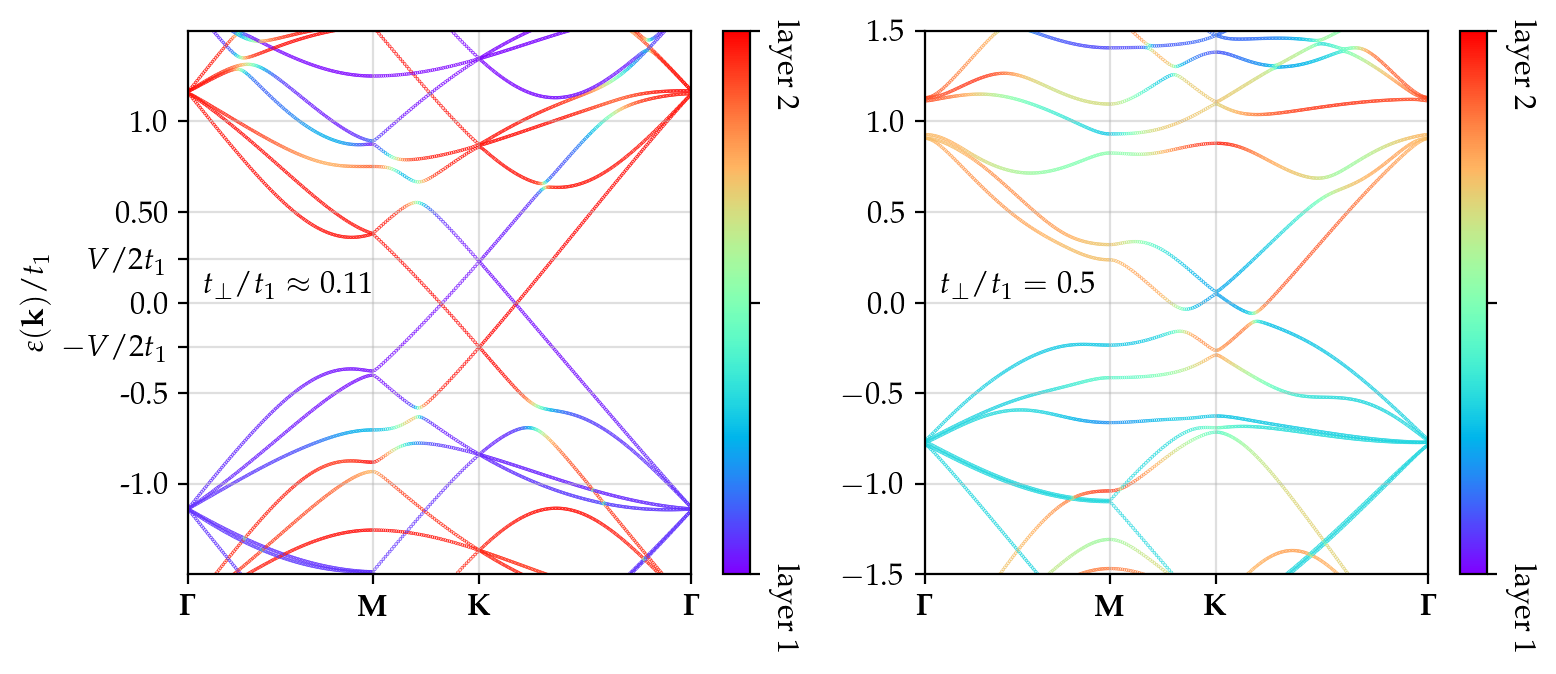

In [49]:
fig,ax=plt.subplots(figsize=(8.0,3.5))

plt.subplot(121)

g=gdef
# plot_bands_with_cmap(g.bands0/2.8922,g.ell,g.layer2_character0,'rainbow')
plot_bands_with_cmap(g.bandsV/2.8922,g.ell,g.layer2_characterV,'rainbow')

cbar=plt.colorbar()
cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270,)

plt.grid(True,alpha=0.4)
plt.xlim((g.ell[0],g.ell[-1]))
plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
plt.ylim((-1.5,1.5))
plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')
plt.yticks([-1.0,-0.5,-V/(2*2.8922),0.0,V/(2*2.8922),0.5,1.0],['-1.0','-0.5','$-V/2t_1$','0.0','$V/2t_1$','0.50','1.0'])
# plt.yticks([-V/(2*2.8922),0,V/(2*2.8922)],['$-V/2$','0','$V/2$'])
plt.annotate(r'$t_{\perp}/t_1\approx 0.11$',(0.05,0.05))

plt.subplot(122)

g=gg
plot_bands_with_cmap(g.bandsV/2.8922,g.ell,g.layer2_characterV,'rainbow')

cbar=plt.colorbar()
cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270,)

plt.grid(True,alpha=0.4)
plt.xlim((g.ell[0],g.ell[-1]))
plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
plt.ylim((-1.5,1.5))
# plt.ylabel('$\\varepsilon(\mathbf{k})$')
# plt.yticks([-1.0,-0.5,-V/(2*2.8922),0.0,V/(2*2.8922),0.5,1.0],['-1.0','-0.5','$-V/2t_1$','0.0','$V/2t_1$','0.50','1.0'])
# plt.yticks([-V/(2*2.8922),0,V/(2*2.8922)],['$-V/2$','0','$V/2$'])
plt.annotate(f'$t_{{\\perp}}/t_1= {hop_ratio}$',(0.05,0.05))


plt.savefig('Fig22_graphene_twisted_electric_field.png',dpi=300)

plt.show()

In [26]:
V/2.8922

0.4840605767236014